In [1]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

pd.set_option('max_columns', None)

# src: https://www.kaggle.com/hjmjerry/gender-discrimination
df = pandas.read_csv("dataset_perso/Lawsuit.csv")
del df['ID']
df

,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,0,0,7.4,9,3,77836,84612
1,1,1,0,0,6.7,10,2,69994,78497
2,1,1,0,0,8.1,6,1,62872,67756
3,1,1,1,1,5.1,27,3,155196,173220
4,1,1,0,0,7.0,10,3,89268,96099
...,...,...,...,...,...,...,...,...,...
256,6,0,1,1,2.9,8,2,297174,323699
257,6,0,1,1,2.6,9,3,308081,339664
258,6,0,1,1,2.8,8,1,211269,241577
259,6,0,1,1,2.4,2,1,210801,233905


In [2]:
salary_mean = np.mean(np.array(df["Sal94"].tolist(), np.float))
for i in range(0,len(df)):
    if df.at[i, "Sal94"] >= salary_mean:
        df.at[i, "Salary_mean"] = 1
    else:
        df.at[i, "Salary_mean"] = 0
del df["Sal94"]
del df["Sal95"]
df

,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Salary_mean
0,1,1,0,0,7.4,9,3,0.0
1,1,1,0,0,6.7,10,2,0.0
2,1,1,0,0,8.1,6,1,0.0
3,1,1,1,1,5.1,27,3,1.0
4,1,1,0,0,7.0,10,3,0.0
...,...,...,...,...,...,...,...,...
256,6,0,1,1,2.9,8,2,1.0
257,6,0,1,1,2.6,9,3,1.0
258,6,0,1,1,2.8,8,1,1.0
259,6,0,1,1,2.4,2,1,1.0


In [3]:
col = ['Rank', 'Dept']
df = df.drop(['Prate', 'Exper'], axis=1)
df = pd.get_dummies(df, columns=col)
df


,Gender,Clin,Cert,Salary_mean,Rank_1,Rank_2,Rank_3,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6
0,1,0,0,0.0,0,0,1,1,0,0,0,0,0
1,1,0,0,0.0,0,1,0,1,0,0,0,0,0
2,1,0,0,0.0,1,0,0,1,0,0,0,0,0
3,1,1,1,1.0,0,0,1,1,0,0,0,0,0
4,1,0,0,0.0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,1,1,1.0,0,1,0,0,0,0,0,0,1
257,0,1,1,1.0,0,0,1,0,0,0,0,0,1
258,0,1,1,1.0,1,0,0,0,0,0,0,0,1
259,0,1,1,1.0,1,0,0,0,0,0,0,0,1


In [4]:
print(df.columns)
X = df.loc[:, ~df.columns.isin(['Gender', 'Salary_mean'])]
y = df['Salary_mean']
sensitive = df['Gender']

index_train = list(df.sample(frac=0.8, random_state=1).index)
index_test = list(df.drop(index=index_train).index)

X_train = X.drop(index=index_test).to_numpy()
y_train = y.drop(index=index_test).to_numpy()
sensitive_train = sensitive.drop(index=index_test).to_numpy()

X_test = X.drop(index=index_train).to_numpy()
y_test = list(y.drop(index=index_train).to_numpy())
sensitive_test = sensitive.drop(index=index_train).to_numpy()
X.drop(index=index_train)

Index(['Gender', 'Clin', 'Cert', 'Salary_mean', 'Rank_1', 'Rank_2', 'Rank_3',
       'Dept_1', 'Dept_2', 'Dept_3', 'Dept_4', 'Dept_5', 'Dept_6'],
      dtype='object')


,Clin,Cert,Rank_1,Rank_2,Rank_3,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6
1,0,0,0,1,0,1,0,0,0,0,0
7,1,1,0,0,1,1,0,0,0,0,0
8,0,0,0,0,1,1,0,0,0,0,0
20,0,1,0,0,1,1,0,0,0,0,0
22,0,1,0,0,1,1,0,0,0,0,0
25,0,1,0,0,1,1,0,0,0,0,0
30,0,0,1,0,0,1,0,0,0,0,0
37,0,1,1,0,0,1,0,0,0,0,0
50,1,1,1,0,0,0,1,0,0,0,0
57,0,1,0,1,0,0,1,0,0,0,0


In [5]:
def descr_clf(sensitive_test, y_pred):
    """
    p0: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 0, clf(𝑥) = +}∣
    p1: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 1, clf(𝑥) = +}∣
    n_zero: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 0}∣
    n_one: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 1}∣
    """
    p0, p1, n_zero, n_one= 0, 0, 0, 0
    for i in range(0, len(y_pred)):
        if sensitive_test[i] == 0.0:
            n_zero+=1
            if y_pred[i] == 1.0:
                p0+=1
        elif sensitive_test[i] == 1.0:
            n_one+=1
            if y_pred[i] == 1.0:
                p1+=1

    if n_one == 0 and n_zero == 0: d = 0
    elif n_zero == 0: d = -(p1/n_one)
    elif n_one == 0: d = p0/n_zero
    else: d = (p0/n_zero) - (p1/n_one)

    #A higher discrimination means that tuples with
    #Sensitive = 1 are less likely to be classified as positive
    return d

def descr(tids):
    """
    p0: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 0, 𝑥.Class = +}∣
    p1: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 1, 𝑥.Class = +}∣
    n_zero: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 0}∣
    n_one: ∣{𝑥 ∈ 𝐷 ∣ 𝑥.Sensitive = 1}∣
    """
    p0, p1, n_zero, n_one= 0, 0, 0, 0
    for i in tids:
        if sensitive_train[i] == 0.0:
            n_zero+=1
            if y_train[i] == 1.0:
                p0+=1
        elif sensitive_train[i] == 1.0:
            n_one+=1
            if y_train[i] == 1.0:
                p1+=1

    if n_one == 0 and n_zero == 0: d = 0
    elif n_zero == 0: d = -(p1/n_one)
    elif n_one == 0: d = p0/n_zero
    else: d = (p0/n_zero) - (p1/n_one)

    #A higher discrimination means that tuples with
    #Sensitive = 1 are less likely to be classified as positive
    return d

def error1(tids):
    classes, supports = np.unique(y_train.take(tids), return_counts=True)
    maxindex = np.argmax(supports)

    return sum(supports) - supports[maxindex], classes[maxindex]

def error11(tids):
    classes, supports = np.unique(y_train.take(tids), return_counts=True)
    maxindex = np.argmax(supports)

    return sum(supports) - supports[maxindex] + abs(descr(tids)), classes[maxindex]

def error2(tids):
    classes, supports = np.unique(y_train.take(list(tids)), return_counts=True)
    maxindex = np.argmax(supports)

    return abs(descr(tids)), classes[maxindex]

def error22(tids):
    classes, supports = np.unique(y_train.take(list(tids)), return_counts=True)
    maxindex = np.argmax(supports)

    return (supports[maxindex] / sum(supports)) + abs(descr(tids)), classes[maxindex]

descr(range(0,len(X_train)))


-0.32561904761904764

In [6]:
result = pd.DataFrame(columns=['function', 'depth', 'accuracy_train', "accuracy_test", 'discrimination', "duration", "min_supp"])

In [7]:
#for supp in range(1, len(X_train), int(len(X_train)/10)):
for supp in range(1, 2):
    for depth in range(1, 10):

        clf = DL85Classifier(max_depth=depth, min_sup=supp, time_limit=600)
        print(f"### Depth: {depth} ###")
        start = time.perf_counter()
        print(f"Model building...")
        clf.fit(X_train, list(y_train))
        duration = time.perf_counter() - start
        print("Model built. Duration of building =", round(duration, 4))
        y_pred = clf.predict(X_train)
        accuracy_train = round(accuracy_score(list(y_train), y_pred), 4)
        print("Accuracy", accuracy_train)
        print("Accuracy DL8.5 on training set =", round(clf.accuracy_, 4))
        y_pred = clf.predict(X_test)
        accuracy_test = round(accuracy_score(y_test, y_pred), 4)
        print("Accuracy DL8.5 on test set =", accuracy_test)
        descrimation = round(descr_clf(sensitive_test, y_pred), 4)
        print("Discrimination of classifier", round(descr_clf(sensitive_test, y_pred), 4))

        result.loc[len(result.index)] = ["no", depth, accuracy_train, accuracy_test, abs(descrimation), duration, supp]

        print()

        clf = DL85Classifier(max_depth=depth, error_function=lambda tids: error1(list(tids)), min_sup=supp, time_limit=600)
        print(f"### Depth: {depth} ###")
        start = time.perf_counter()
        print(f"Model building...")
        clf.fit(X_train, list(y_train))
        duration = time.perf_counter() - start
        print("Model built. Duration of building =", round(duration, 4))
        y_pred = clf.predict(X_train)
        accuracy_train = round(accuracy_score(list(y_train), y_pred), 4)
        print("Accuracy", accuracy_train)
        print("Accuracy DL8.5 on training set =", round(clf.accuracy_, 4))
        y_pred = clf.predict(X_test)
        accuracy_test = round(accuracy_score(y_test, y_pred), 4)
        print("Accuracy DL8.5 on test set =", accuracy_test)
        descrimation = round(descr_clf(sensitive_test, y_pred), 4)
        print("Discrimination of classifier", round(descr_clf(sensitive_test, y_pred), 4))

        result.loc[len(result.index)] = ["error1", depth, accuracy_train, accuracy_test, abs(descrimation), duration, supp]

        print()

        clf = DL85Classifier(max_depth=depth, error_function=lambda tids: error11(list(tids)), min_sup=supp, time_limit=600)
        print(f"### Depth: {depth} ###")
        start = time.perf_counter()
        print(f"Model building...")
        clf.fit(X_train, list(y_train))
        duration = time.perf_counter() - start
        print("Model built. Duration of building =", round(duration, 4))
        y_pred = clf.predict(X_train)
        accuracy_train = round(accuracy_score(list(y_train), y_pred), 4)
        print("Accuracy", accuracy_train)
        print("Accuracy DL8.5 on training set =", round(clf.accuracy_, 4))
        y_pred = clf.predict(X_test)
        accuracy_test = round(accuracy_score(y_test, y_pred), 4)
        print("Accuracy DL8.5 on test set =", accuracy_test)
        descrimation = round(descr_clf(sensitive_test, y_pred), 4)
        print("Discrimination of classifier", round(descr_clf(sensitive_test, y_pred), 4))

        result.loc[len(result.index)] = ["error11", depth, accuracy_train, accuracy_test, abs(descrimation), duration, supp]

        print()

        clf = DL85Classifier(max_depth=depth, error_function=lambda tids: error2(list(tids)), min_sup=supp, time_limit=600)
        print(f"### Depth: {depth} ###")
        start = time.perf_counter()
        print(f"Model building...")
        clf.fit(X_train, list(y_train))
        duration = time.perf_counter() - start
        print("Model built. Duration of building =", round(duration, 4))
        y_pred = clf.predict(X_train)
        accuracy_train = round(accuracy_score(list(y_train), y_pred), 4)
        print("Accuracy", accuracy_train)
        print("Accuracy DL8.5 on training set =", round(clf.accuracy_, 4))
        y_pred = clf.predict(X_test)
        accuracy_test = round(accuracy_score(y_test, y_pred), 4)
        print("Accuracy DL8.5 on test set =", accuracy_test)
        descrimation = round(descr_clf(sensitive_test, y_pred), 4)
        print("Discrimination of classifier", round(descr_clf(sensitive_test, y_pred), 4))

        result.loc[len(result.index)] = ["error2", depth, accuracy_train, accuracy_test, abs(descrimation), duration, supp]

        print()

        clf = DL85Classifier(max_depth=depth, error_function=lambda tids: error22(list(tids)), min_sup=supp, time_limit=600)
        print(f"### Depth: {depth} ###")
        start = time.perf_counter()
        print(f"Model building...")
        clf.fit(X_train, list(y_train))
        duration = time.perf_counter() - start
        print("Model built. Duration of building =", round(duration, 4))
        y_pred = clf.predict(X_train)
        accuracy_train = round(accuracy_score(list(y_train), y_pred), 4)
        print("Accuracy", accuracy_train)
        print("Accuracy DL8.5 on training set =", round(clf.accuracy_, 4))
        y_pred = clf.predict(X_test)
        accuracy_test = round(accuracy_score(y_test, y_pred), 4)
        print("Accuracy DL8.5 on test set =", accuracy_test)
        descrimation = round(descr_clf(sensitive_test, y_pred), 4)
        print("Discrimination of classifier", round(descr_clf(sensitive_test, y_pred), 4))

        result.loc[len(result.index)] = ["error22", depth, accuracy_train, accuracy_test, abs(descrimation), duration, supp]

        print()

### Depth: 1 ###
Model building...
Model built. Duration of building = 0.1369
Accuracy 0.756
Accuracy DL8.5 on training set = 0.756
Accuracy DL8.5 on test set = 0.7308
Discrimination of classifier -0.2667

### Depth: 1 ###
Model building...
Model built. Duration of building = 0.0057
Accuracy 0.756
Accuracy DL8.5 on training set = 0.756
Accuracy DL8.5 on test set = 0.7308
Discrimination of classifier -0.2667

### Depth: 1 ###
Model building...
Model built. Duration of building = 0.0398
Accuracy 0.756
Accuracy DL8.5 on training set = 0.7548
Accuracy DL8.5 on test set = 0.7308
Discrimination of classifier -0.2667

### Depth: 1 ###
Model building...
Model built. Duration of building = 0.0355
Accuracy 0.756
Accuracy DL8.5 on training set = 0.9988
Accuracy DL8.5 on test set = 0.7308
Discrimination of classifier -0.2667

### Depth: 1 ###
Model building...
Model built. Duration of building = 0.0404
Accuracy 0.6077
Accuracy DL8.5 on training set = 0.992
Accuracy DL8.5 on test set = 0.5385
Discr

In [8]:
result = result.sort_values(['function', 'depth', 'min_supp'])
result

,function,depth,accuracy_train,accuracy_test,discrimination,duration,min_supp
1,error1,1,0.7560,0.7308,0.2667,0.005689,1
6,error1,2,0.8804,0.8462,0.3758,0.023907,1
11,error1,3,0.8995,0.8077,0.4545,0.100198,1
16,error1,4,0.9234,0.9038,0.2152,0.314224,1
21,error1,5,0.9234,0.8846,0.1818,0.842394,1
26,error1,6,0.9234,0.8462,0.2485,1.313954,1
31,error1,7,0.9234,0.8462,0.2485,2.043233,1
36,error1,8,0.9234,0.8462,0.2485,1.900515,1
41,error1,9,0.9234,0.8462,0.2485,1.889442,1
2,error11,1,0.7560,0.7308,0.2667,0.039762,1


In [9]:
import matplotlib.pyplot as plt
import numpy as np


def print_plot(x_axe, y_axe):
    name = "no"
    name1 = "error1"
    name2 = "error11"
    name3 = "error2"
    name4 = "error22"

    plt.plot(result.loc[result['function'] == name][x_axe].tolist(), result.loc[result['function'] == name][y_axe].tolist(), label = name, linestyle=":")
    plt.plot(result.loc[result['function'] == name1][x_axe].tolist(), result.loc[result['function'] == name1][y_axe].tolist(), label = name1, linestyle="--")
    plt.plot(result.loc[result['function'] == name2][x_axe].tolist(), result.loc[result['function'] == name2][y_axe].tolist(), label = name2, linestyle="-.")
    plt.plot(result.loc[result['function'] == name3][x_axe].tolist(), result.loc[result['function'] == name3][y_axe].tolist(), label = name3)
    #plt.plot(result.loc[result['function'] == name4][x_axe].tolist(), result.loc[result['function'] == name4][y_axe].tolist(), label = name4)
    plt.xlabel(x_axe)
    plt.ylabel(y_axe)
    plt.legend()
    plt.show()


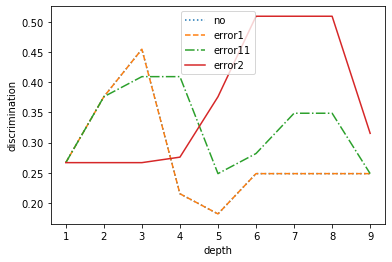

In [10]:
print_plot("depth", "discrimination")

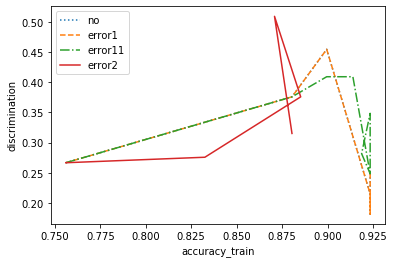

In [11]:
print_plot("accuracy_train", "discrimination")

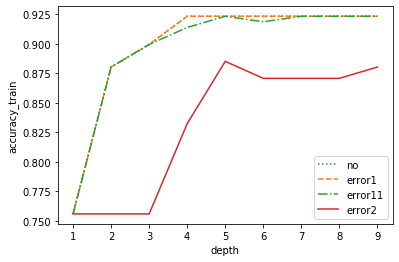

In [12]:
print_plot("depth", "accuracy_train")

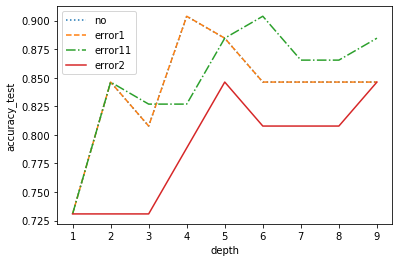

In [13]:
print_plot("depth", "accuracy_test")

In [14]:
from pprint import pprint
d1 = clf.tree_
pprint(d1)

{'feat': 0,
 'left': {'feat': 3,
          'left': {'feat': 1,
                   'left': {'feat': 5,
                            'left': {'error': 1.0,
                                     'proba': [1.0, 0],
                                     'value': 0},
                            'proba': [0.3076923076923077, 0.6923076923076923],
                            'right': {'feat': 8,
                                      'left': {'error': 0.916667,
                                               'proba': [0.6666666666666666,
                                                         0.3333333333333333],
                                               'value': 0},
                                      'proba': [0.28, 0.72],
                                      'right': {'feat': 6,
                                                'left': {'error': 1.0,
                                                         'proba': [1.0, 0],
                                                         'value':

In [15]:
#d2 = clf.tree_
pprint(d2)

NameError: name 'd2' is not defined

In [ ]:
d3 = clf.tree_
pprint(d3)